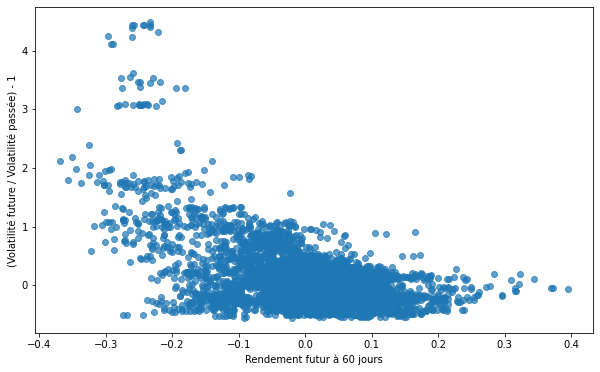

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

chemin_fichier_excel = "C:\\Users\\lecle\\Desktop\\ENSAE\\SX5Edec2021.xlsx"

df = pd.read_excel(chemin_fichier_excel)

df = pd.read_excel(chemin_fichier_excel, parse_dates=['Dates'])
df = df.rename(columns={'SX5E Index': 'Cours'})

# Supposons que tu aies déjà un DataFrame df avec les colonnes Dates et Cours
# Si le DataFrame ne contient pas déjà la colonne 'rendement', calcule-la
df['rendement'] = df['Cours'].pct_change()

# Calcule la volatilité passée à 60 jours
df['volatilite_60jours_passée'] = df['Cours'].pct_change().rolling(window=60).std()

# Calcule la volatilité future à 60 jours (shift(-60) décale les valeurs de 60 jours vers l'avant)
df['volatilite_60jours_future'] = df['Cours'].pct_change().shift(-60).rolling(window=60).std()

df['performance_future'] = df['Cours'].shift(-60) / df['Cours'] - 1

df['ratio_volatilite'] = (df['volatilite_60jours_future'] / df['volatilite_60jours_passée']) - 1

# Création du graphique en nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(df['performance_future'], df['ratio_volatilite'], alpha=0.7)

# Ajout de labels et titre
plt.title('')
plt.xlabel('Rendement futur à 60 jours')
plt.ylabel('(Volatilité future / Volatilité passée) - 1')

chemin_sauvegarde = 'C:\\Users\\lecle\\Desktop\\ENSAE\\Graphiques StatApp\\graphe_2.png'
plt.savefig(chemin_sauvegarde, dpi=300)

# Affichage du graphique
plt.show()

